sum_px:  1.0
sum of posterior: 1.0
Prediction:  74
Posterior map:  82
max of prior:  85


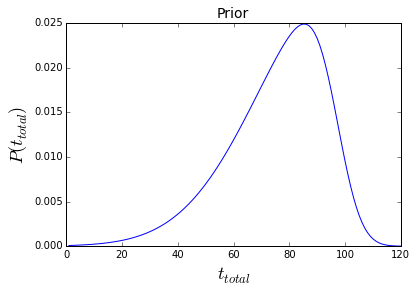

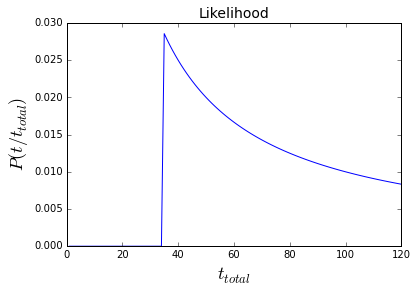

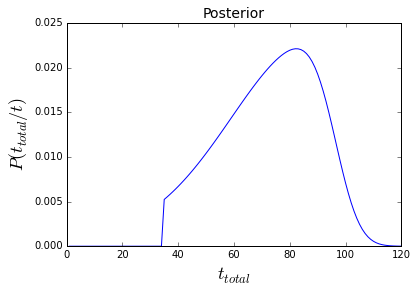

In [172]:
import numpy as np
import scipy.stats as st
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib inline
    
    
x = 35 # observed value 
max_age = 120  
thetas = np.linspace(start=1, stop=max_age, num=max_age)   # all possible values of theta (from 1 to 120)
p_theta = [(st.skewnorm.pdf(p, a=-4, loc=97, scale=28)) for p in thetas]  # prior probability: p(theta)
#p_theta = [(st.skewnorm.pdf(p, a=0, loc=75, scale=16)) for p in thetas] 
p_theta = p_theta/np.sum(p_theta)    # normalize prior (to sum up to 1)
##### SCALING
#p_theta = [a*100 for a in p_theta]
plt.figure()
plt.plot(thetas, p_theta)
plt.xlim(0,120)
plt.title("Prior", fontsize=14)
plt.xlabel("$t_{total}$", fontsize=18)
plt.ylabel("$P(t_{total})$", fontsize=18)
#plt.xlabel("theta", fontsize=14)
#plt.ylabel("P(theta)", fontsize=14)


# computing normalizing factor for p_x
thetas = np.linspace(start=1, stop=max_age, num=max_age) 
sum_px = 0
for x_prime in np.arange(1, len(thetas)+1, 1):
    likelihood = [1/p for p in thetas]  #  p(X/theta)
    likelihood[0:x_prime-1] = [0]*(x_prime-1)  # likelihood is 1/theta for theta >= x and 0 otherwise
    p_x = np.sum(np.multiply(p_theta, likelihood))
    sum_px += p_x

print "sum_px: ", sum_px   # this comes out to be 1 which is a good sign
  
##### SCALING
#likelihood = [1*100/p for p in thetas]  #  p(X/theta)
    
likelihood = [1/p for p in thetas]  #  p(X/theta)
likelihood[0:x-1] = [0]*(x-1)  # likelihood is 1/theta for theta >= x and 0 otherwise
#likelihood = likelihood/np.sum(likelihood)  # normalize likelihood (to sum up to 1) 
plt.figure()
plt.plot(thetas, likelihood)
plt.title("Likelihood", fontsize=14)
plt.xlabel("$t_{total}$", fontsize=18)
plt.ylabel("$P(t/t_{total})$", fontsize=18)
#plt.xlabel("theta", fontsize=14)
#plt.ylabel("P(X/theta)", fontsize=14)


#p_x = np.sum(np.divide(p_theta[x-1: len(thetas)], thetas[x-1: len(thetas)])) # p(x) is the sum of p(theta)/theta for theta = 50 to 120
p_x = np.sum(np.multiply(p_theta, likelihood)) 
p_x = p_x / sum_px   # normalizing, though in this case sum_px = 1


posterior = np.multiply(p_theta, likelihood) / p_x  # p(theta/X) = likelihood * prior
posterior = posterior/np.sum(posterior)  # normalize posterior (to sum up to 1)
plt.figure()
plt.plot(thetas, posterior)
plt.title("Posterior", fontsize=14)
plt.xlabel("$t_{total}$", fontsize=18)
plt.ylabel("$P(t_{total}/t)$", fontsize=18)
#plt.xlabel("theta", fontsize=14)
#plt.ylabel("P(theta/X)", fontsize=14)


print "sum of posterior:", sum(posterior)
nonzero_post = posterior[x-1:]

median = 0
for a in np.arange(len(posterior)):
    cum = sum(posterior[:a+1])
    if cum == 0.5 or cum > 0.5:
        median = a + 1
        break
    
print "Prediction: ", median
print "Posterior map: ", np.argmax(posterior)+1
print "max of prior: ", np.argmax(p_theta)+1



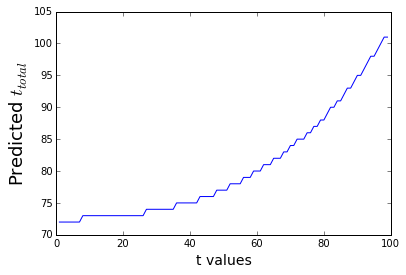

In [171]:
import numpy as np
import scipy.stats as st
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib inline

def median(posterior):
    median = 0
    for a in np.arange(len(posterior)):
        cum = sum(posterior[:a+1])
        if cum == 0.5 or cum > 0.5:
            median = a + 1
            break
    return median

max_age = 120
thetas = np.linspace(start=1, stop=max_age, num=max_age)   # all possible values of theta (from 1 to 120)
p_theta = [(st.skewnorm.pdf(p, a=-4, loc=97, scale=28)) for p in thetas]  # prior probability: p(theta)
#p_theta = [(st.norm.pdf(p, loc=75, scale=16)) for p in thetas] 
p_theta = p_theta/np.sum(p_theta)    # normalize prior (to sum up to 1)

predictions = []
for x in np.arange(1,100,1):
    likelihood = [1/p for p in thetas]  #  p(X/theta)
    likelihood[0:x-1] = [0]*(x-1)  # likelihood is 1/theta for theta >= x and 0 otherwise
    p_x = np.sum(np.multiply(p_theta, likelihood))       # already sums to 1
    posterior = np.multiply(p_theta, likelihood) / p_x   # already sums to 1
    #predictions.append(np.argmax(posterior) + 1) 
    prediction = median(posterior)
    predictions.append(prediction)
    
plt.figure()
plt.plot(np.arange(1,100,1), predictions)
plt.xlabel("t values", fontsize=14)
plt.ylabel("Predicted $t_{total}$", fontsize=18)
    
    

alpha_hat:  75


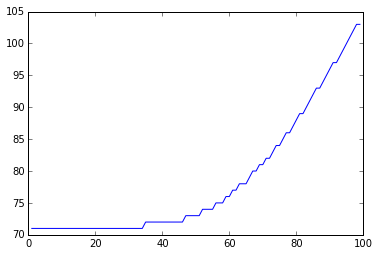

In [109]:
# empirical bayes my way

import numpy as np
import scipy.stats as st
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib inline

max_age = 120
x = 52   # x = 52, gives alpha_hat = 75
thetas = np.linspace(start=1, stop=max_age, num=max_age)   # all possible values of theta (from 1 to 120)
#p_theta = [(st.skewnorm.pdf(p, a=-4, loc=97, scale=28)) for p in thetas]  # prior probability: p(theta)
likelihood = [1/p for p in thetas]  #  p(X/theta)
likelihood[0:x-1] = [0]*(x-1)  # likelihood is 1/theta for theta >= x and 0 otherwise

# declare a matrix which will store p_theta along columns for each given alpha
# theta varies along rows, and alpha varies along columns
p_matrix = np.zeros((len(thetas), max_age))
for x in np.arange(1,max_age+1,1):
    p_theta = [(st.norm.pdf(p, loc=x, scale=16)) for p in thetas]
    p_theta = p_theta/np.sum(p_theta)    # normalize prior (to sum up to 1)
    p_matrix[:, x-1] = p_theta
    
# Now compute p(X/alpha) by marginalizing out theta for each alpha
marginpost_set = np.dot(likelihood, p_matrix)   # this will be a list of dimentions (1 x max_age)
#pick the max value and find the corresponding alpha
#print marginpost_set
alpha_hat = np.argmax(marginpost_set) + 1


print "alpha_hat: ", alpha_hat

# p(theta/alpha_hat)
p_theta_ga = [(st.norm.pdf(p, loc=alpha_hat, scale=16)) for p in thetas]
p_x = np.sum(np.multiply(p_theta_ga, likelihood)) 
posterior = np.multiply(p_theta_ga, likelihood) / p_x
"""plt.figure()
plt.plot(thetas, posterior)
plt.title("Posterior")
plt.xlabel("theta")
plt.ylabel("P(theta/X)")"""

def median(posterior):
    median = 0
    for a in np.arange(len(posterior)):
        cum = sum(posterior[:a+1])
        if cum == 0.5 or cum > 0.5:
            median = a + 1
            break
    return median

predictions = []
for x in np.arange(1,100,1):
    likelihood = [1/p for p in thetas]  #  p(X/theta)
    likelihood[0:x-1] = [0]*(x-1)  # likelihood is 1/theta for theta >= x and 0 otherwise
    p_x = np.sum(np.multiply(p_theta_ga, likelihood))       # already sums to 1
    posterior = np.multiply(p_theta_ga, likelihood) / p_x   # already sums to 1
    #predictions.append(np.argmax(posterior) + 1) 
    prediction = median(posterior)
    predictions.append(prediction)
    
plt.figure()
plt.plot(np.arange(1,100,1), predictions)


alpha_hat:  76


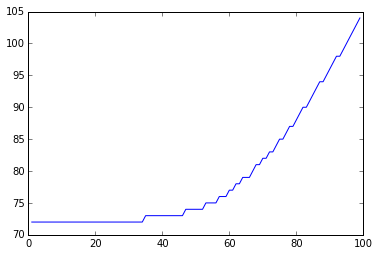

In [174]:
# empirical bayes my way, multiple data or x values

import numpy as np
import scipy.stats as st
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib inline

max_age = 120
x1 = 35   # x = 52, gives alpha_hat = 75
x2 = 5
x3 = 20
x4 = 55
x5 = 65
thetas = np.linspace(start=1, stop=max_age, num=max_age)   # all possible values of theta (from 1 to 120)
#p_theta = [(st.skewnorm.pdf(p, a=-4, loc=97, scale=28)) for p in thetas]  # prior probability: p(theta)
likelihood1 = [1/p for p in thetas]  #  p(X/theta)
likelihood1[0:x1-1] = [0]*(x1-1)  # likelihood is 1/theta for theta >= x and 0 otherwise

likelihood2 = [1/p for p in thetas]  #  p(X/theta)
likelihood2[0:x2-1] = [0]*(x2-1)

likelihood3 = [1/p for p in thetas]  #  p(X/theta)
likelihood3[0:x3-1] = [0]*(x3-1)

likelihood4 = [1/p for p in thetas]  #  p(X/theta)
likelihood4[0:x4-1] = [0]*(x4-1)

likelihood5 = [1/p for p in thetas]  #  p(X/theta)
likelihood5[0:x5-1] = [0]*(x5-1)

likelihood = np.multiply(np.multiply(likelihood1, likelihood2), np.multiply(likelihood3, likelihood4))
likelihood = np.multiply(likelihood, likelihood5)

# declare a matrix which will store p_theta along columns for each given alpha
# theta varies along rows, and alpha varies along columns
p_matrix = np.zeros((len(thetas), max_age))
for x in np.arange(1,max_age+1,1):
    p_theta = [(st.norm.pdf(p, loc=x, scale=16)) for p in thetas]
    p_theta = p_theta/np.sum(p_theta)    # normalize prior (to sum up to 1)
    p_matrix[:, x-1] = p_theta
    
# Now compute p(X/alpha) by marginalizing out theta for each alpha
#likelihood = likelihood/sum(likelihood)  # get same alpha hat even when likelihood and p_matrix are normalized
#p_matrix = p_matrix/sum(p_matrix)
marginpost_set = np.dot(likelihood, p_matrix)   # this will be a list of dimentions (1 x max_age)
#pick the max value and find the corresponding alpha
#print marginpost_set
alpha_hat = np.argmax(marginpost_set) + 1


print "alpha_hat: ", alpha_hat

# p(theta/alpha_hat)
p_theta_ga = [(st.norm.pdf(p, loc=alpha_hat, scale=16)) for p in thetas]
p_x = np.sum(np.multiply(p_theta_ga, likelihood)) 
posterior = np.multiply(p_theta_ga, likelihood) / p_x
"""plt.figure()
plt.plot(thetas, posterior)
plt.title("Posterior")
plt.xlabel("theta")
plt.ylabel("P(theta/X)")"""

def median(posterior):
    median = 0
    for a in np.arange(len(posterior)):
        cum = sum(posterior[:a+1])
        if cum == 0.5 or cum > 0.5:
            median = a + 1
            break
    return median

predictions = []
for x in np.arange(1,100,1):
    likelihood = [1/p for p in thetas]  #  p(X/theta)
    likelihood[0:x-1] = [0]*(x-1)  # likelihood is 1/theta for theta >= x and 0 otherwise
    p_x = np.sum(np.multiply(p_theta_ga, likelihood))       # already sums to 1
    posterior = np.multiply(p_theta_ga, likelihood) / p_x   # already sums to 1
    #predictions.append(np.argmax(posterior) + 1) 
    prediction = median(posterior)
    predictions.append(prediction)
    
plt.figure()
plt.plot(np.arange(1,100,1), predictions)

In [34]:
# empirical bayes Chris's way, multiple data or x values


# assume a valur of alpha for prior
p_theta = [(st.norm.pdf(p, loc=50, scale=16)) for p in thetas]  # prior probability: p(theta)
thetas = np.linspace(start=1, stop=max_age, num=max_age) # all possible values of theta (from 1 to 120)

max_age = 120
x1 = 35   # x = 52, gives alpha_hat = 75
x2 = 5
x3 = 25
x4 = 55
x5 = 65
likelihood1 = [1/p for p in thetas]  #  p(X/theta)
likelihood1[0:x1-1] = [0]*(x1-1)  # likelihood is 1/theta for theta >= x and 0 otherwise

likelihood2 = [1/p for p in thetas] 
likelihood2[0:x2-1] = [0]*(x2-1)

likelihood3 = [1/p for p in thetas]  
likelihood3[0:x3-1] = [0]*(x3-1)

likelihood4 = [1/p for p in thetas]  
likelihood4[0:x4-1] = [0]*(x4-1)

likelihood5 = [1/p for p in thetas]  
likelihood5[0:x5-1] = [0]*(x5-1)

likelihood = np.multiply(np.multiply(likelihood1, likelihood2), np.multiply(likelihood3, likelihood4))
likelihood = np.multiply(likelihood, likelihood5)  #  p(X/theta)


p_x = np.sum(np.multiply(p_theta, likelihood))       # already sums to 1
posterior = np.multiply(p_theta, likelihood) / p_x   # p(theta/X)


p_theta = 
alpha_g_theta =  # p(alpha/theta)




1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
def median(l, posterior):
    srt = sorted(l)
    mid = len(l)//2
    if len(l) % 2: # f list length mod 2 has a remainder the list is an odd lenght
            med = srt[mid]
            prediction = np.where(posterior == med)[0][0] + 1
            return prediction
    else:
        mid1 = srt[mid]
        mid2 = srt[mid-1]
        med = (mid1 + mid2) / 2  # in a list [1,2,3,4] srt[mid]-> 2, srt[mid-1] -> 3
        pred1 = np.where(posterior == mid1)[0][0] + 1
        pred2 = np.where(posterior == mid2)[0][0] + 1
        prediction = (pred1 + pred2) / 2
        return prediction
